# MINI PROJECT

## TELCO CUSTOMER Target PREDICTION

Tujuan kali ini ialah untuk mencari parameter terbaik untuk model machine learning.

## IMPORT LIBRARY

In [1]:
# import library yg diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

#library untuk model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#library untuk hyperparameter tuning
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

In [2]:
#load data
df_log = pd.read_csv("df_ready_log.csv")
df_dec = pd.read_csv("df_ready_dec.csv")

In [3]:
df_log.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Course,Application mode,...,Curricular units 2nd sem (credited),Previous qualification,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Marital status,Daytime/evening attendance\t,Nationality,International,Educational special needs,Target
0,0,0.000000,0,1,0.000000,0,0,0,171,17,...,0,1,0,0,1,1,1,0,0,0
1,6,13.666667,6,0,14.000000,0,0,6,9254,15,...,0,1,0,0,1,1,1,0,0,1
2,0,0.000000,0,0,0.000000,0,0,0,9070,1,...,0,1,0,0,1,1,1,0,0,0
3,5,12.400000,6,1,13.428571,0,0,10,9773,17,...,0,1,0,0,1,1,1,0,0,1
4,6,13.000000,5,1,12.333333,0,0,6,8014,39,...,0,1,0,0,2,0,1,0,0,1


In [4]:
df_dec.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Course,Application mode,...,Curricular units 2nd sem (credited),Previous qualification,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Marital status,Daytime/evening attendance\t,Nationality,International,Educational special needs,Target
0,0,0.000000,0,1,0.000000,0,0,0,171,17,...,0,1,0,0,1,1,1,0,0,0
1,6,13.666667,6,0,14.000000,0,0,6,9254,15,...,0,1,0,0,1,1,1,0,0,1
2,0,0.000000,0,0,0.000000,0,0,0,9070,1,...,0,1,0,0,1,1,1,0,0,0
3,5,12.400000,6,1,13.428571,0,0,10,9773,17,...,0,1,0,0,1,1,1,0,0,1
4,6,13.000000,5,1,12.333333,0,0,6,8014,39,...,0,1,0,0,2,0,1,0,0,1


## MODELING

### LOGISTIC REGRESSION

In [5]:
# split target variable
X = df_log.drop(columns = 'Target')
y = df_log['Target']

In [6]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [7]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# buat ypredict
y_pred = model.predict(X_test)

In [9]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [10]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [11]:
#cek hasil
result.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Course,Application mode,...,Previous qualification,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Marital status,Daytime/evening attendance\t,Nationality,International,Educational special needs,y_act,y_pred
304,6,15.750000,6,1,16.153846,1,0,10,9085,1,...,1,0,0,1,1,1,0,0,1,1
88,5,12.800000,5,1,13.400000,0,0,5,9085,1,...,1,0,0,1,1,1,0,0,1,1
1239,2,10.500000,4,1,10.750000,0,0,12,9130,44,...,39,0,0,1,1,1,0,0,0,0
905,6,13.666667,6,1,13.666667,1,0,9,9670,17,...,1,0,0,1,1,1,0,0,1,1
3499,6,12.428571,6,1,13.166667,0,0,8,9773,17,...,1,0,0,1,1,1,0,0,1,1


#### CONFUSION MATRIX

In [12]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[221  75]
 [ 29 401]]


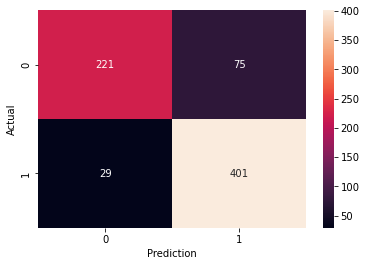

In [13]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [14]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       296
           1       0.84      0.93      0.89       430

    accuracy                           0.86       726
   macro avg       0.86      0.84      0.85       726
weighted avg       0.86      0.86      0.85       726



#### CV SCORE

In [15]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [16]:
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8567434269096088, 0.8663932577601046)


### DECISION TREE

In [17]:
# split target variable
X = df_dec.drop(columns = 'Target')
y = df_dec['Target']

In [18]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [19]:
# model train dan fitting
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
# buat ypredict
y_pred = model.predict(X_test)

In [21]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [22]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [23]:
#cek hasil
result.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Course,Application mode,...,Previous qualification,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Marital status,Daytime/evening attendance\t,Nationality,International,Educational special needs,y_act,y_pred
304,6,15.750000,6,1,16.153846,1,0,10,9085,1,...,1,0,0,1,1,1,0,0,1,1
88,5,12.800000,5,1,13.400000,0,0,5,9085,1,...,1,0,0,1,1,1,0,0,1,1
1239,2,10.500000,4,1,10.750000,0,0,12,9130,44,...,39,0,0,1,1,1,0,0,0,0
905,6,13.666667,6,1,13.666667,1,0,9,9670,17,...,1,0,0,1,1,1,0,0,1,1
3499,6,12.428571,6,1,13.166667,0,0,8,9773,17,...,1,0,0,1,1,1,0,0,1,1


#### CONFUSION MATRIX

In [24]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[240  56]
 [ 65 365]]


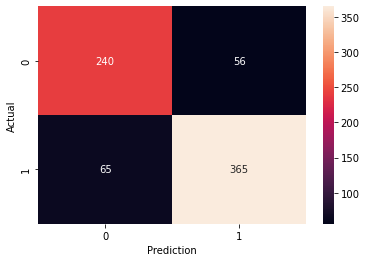

In [25]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [26]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       296
           1       0.87      0.85      0.86       430

    accuracy                           0.83       726
   macro avg       0.83      0.83      0.83       726
weighted avg       0.83      0.83      0.83       726



#### CV SCORE

In [27]:
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.8581292658318, 0.8553771737195086)


### GRADIENTBOOSTINGCLASSIFIER

In [28]:
# split target variable
X = df_dec.drop(columns = 'Target')
y = df_dec['Target']

In [29]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [30]:
# model train dan fitting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [31]:
# buat ypredict
y_pred = model.predict(X_test)

In [32]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [33]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [34]:
#cek hasil
result.head()

,Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Curricular units 1st sem (grade),Scholarship holder,Debtor,Curricular units 2nd sem (evaluations),Course,Application mode,...,Previous qualification,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (without evaluations),Marital status,Daytime/evening attendance\t,Nationality,International,Educational special needs,y_act,y_pred
304,6,15.750000,6,1,16.153846,1,0,10,9085,1,...,1,0,0,1,1,1,0,0,1,1
88,5,12.800000,5,1,13.400000,0,0,5,9085,1,...,1,0,0,1,1,1,0,0,1,1
1239,2,10.500000,4,1,10.750000,0,0,12,9130,44,...,39,0,0,1,1,1,0,0,0,0
905,6,13.666667,6,1,13.666667,1,0,9,9670,17,...,1,0,0,1,1,1,0,0,1,1
3499,6,12.428571,6,1,13.166667,0,0,8,9773,17,...,1,0,0,1,1,1,0,0,1,1


#### CONFUSION MATRIX

In [35]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[248  48]
 [ 23 407]]


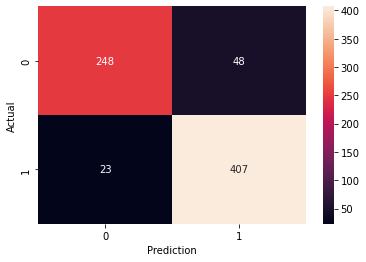

In [36]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [37]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       296
           1       0.89      0.95      0.92       430

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



#### CV SCORE

In [38]:
print("CV Accuracy :", cv_score(model, X_train, y_train, "accuracy",5))

CV Accuracy : (0.9077185589649238, 0.9094415098818921)


> Kita akan bandingkan score ke3 model sebelum dituning

In [39]:
print("CV Accuracy Logistic:", cv_score(LogisticRegression(), X_train, y_train, "accuracy",5))
print("CV Accuracy DecisionTree:", cv_score(DecisionTreeClassifier(), X_train, y_train, "accuracy",5))
print("CV Accuracy GradientBoosting:", cv_score(GradientBoostingClassifier(), X_train, y_train, "accuracy",5))

CV Accuracy Logistic: (0.8560614873286247, 0.8471036856786753)
CV Accuracy DecisionTree: (0.8529657546441924, 0.8536565968306725)
CV Accuracy GradientBoosting: (0.9073743248857499, 0.9090972758027183)


## SET PARAMETER FOR HYPERPARAMETER

- LOGISTIC REGRESSION

In [40]:
# parameter logistic regression + nilainya pada tiap parameter dalam bentuk dictionary
log_param = [{'solver' : ['saga'],
          'penalty' : ['elasticnet', 'l1', 'l2', 'none'],
          'max_iter' : [100, 200, 500], 
          'C' : [0.01, 0.1, 1], 
          'l1_ratio' : [0,1]},
         
          {'solver' : ['newton-cg', 'lbfgs'],
           'penalty' : ['l2','none'],
           'max_iter' : [100, 200, 500],
           'C' : [0.01, 0.1, 1],
           'l1_ratio' : [0,1]}]

- DECISION TREE

In [58]:
# parameter decision tree + nilainya pada tiap parameter dalam bentuk dictionary
dec_param = [{
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 4, 6, 8, 10, 12],
    'min_samples_split' : [i for i in range(1,10)],
    'min_samples_leaf' : [i for i in range(1,10)]}]

- GRADIENTBOOSTINGCLASSIFIER

In [42]:
# parameter GradientBoostingClassifier + nilainya pada tiap parameter dalam bentuk dictionary
gb_param = [{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt'] }]

### GRID SEARCH (GRID SEARCH CROSS VALIDATION)

#### LOGISTIC

In [43]:
# split target variable
X = df_log.drop(columns = 'Target')
y = df_log['Target']

In [44]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [45]:
# model train dan fitting
model = LogisticRegression()

In [46]:
# gunakan grid search cv
model_gs = GridSearchCV(estimator = model, param_grid = log_param, cv = 5, scoring = 'accuracy') # scoring disesuaikan dengan metrics yang relevan

In [47]:
# fit grid search cv
model_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.01, 0.1, 1], 'l1_ratio': [0, 1],
                          'max_iter': [100, 200, 500],
                          'penalty': ['elasticnet', 'l1', 'l2', 'none'],
                          'solver': ['saga']},
                         {'C': [0.01, 0.1, 1], 'l1_ratio': [0, 1],
                          'max_iter': [100, 200, 500],
                          'penalty': ['l2', 'none'],
                          'solver': ['newton-cg', 'lbfgs']}],
             scoring='accuracy')

In [48]:
# hasil best parameter
model_gs.best_params_

{'C': 1,
 'l1_ratio': 0,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [49]:
# train tuned model( hasil grid search cv)
model_gs_tuned = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter=100, l1_ratio = 0, C=  1)
model_gs_tuned.fit(X_train, y_train)

LogisticRegression(C=0.01, l1_ratio=0, max_iter=6, penalty='none',
                   solver='newton-cg')

##### MODEL EVALUATION

In [50]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       296
           1       0.89      0.95      0.92       430

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



In [51]:
# hasil tuned model dengan grid search cv
y_pred_gs_tuned_log = model_gs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_gs_tuned_log))

              precision    recall  f1-score   support

           0       0.90      0.54      0.67       296
           1       0.75      0.96      0.84       430

    accuracy                           0.79       726
   macro avg       0.83      0.75      0.76       726
weighted avg       0.81      0.79      0.77       726



In [52]:
accuracy_score(y_test, y_pred_gs_tuned_log)

0.7878787878787878

#### DECISION TREE

In [59]:
# split target variable
X = df_dec.drop(columns = 'Target')
y = df_dec['Target']

In [60]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [61]:
# model train dan fitting
model = DecisionTreeClassifier()

In [62]:
# gunakan grid search cv
model_gs = GridSearchCV(estimator = model, param_grid = dec_param, cv = 5, scoring = 'accuracy') # scoring disesuaikan dengan metrics yang relevan

In [63]:
# fit grid search cv
model_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8, 10, 12],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'splitter': ['best', 'random']}],
             scoring='accuracy')

In [64]:
# hasil best parameter
model_gs.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'splitter': 'random'}

In [65]:
# train tuned model( hasil grid search cv)
model_gs_tuned = DecisionTreeClassifier(splitter = 'random', min_samples_split = 4, min_samples_leaf=5, max_depth = 6, criterion=  'gini')
model_gs_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=4,
                       splitter='random')

##### MODEL EVALUATION

In [66]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       296
           1       0.89      0.95      0.92       430

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



In [67]:
# hasil tuned model dengan grid search cv
y_pred_rs_tuned_dec = model_gs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned_dec))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       296
           1       0.87      0.91      0.89       430

    accuracy                           0.86       726
   macro avg       0.86      0.85      0.86       726
weighted avg       0.86      0.86      0.86       726



In [68]:
accuracy_score(y_test, y_pred_rs_tuned_dec)

0.8636363636363636

#### GRADIENTBOOSTINGCLASSIFIER

In [85]:
# split target variable
X = df_dec.drop(columns = 'Target')
y = df_dec['Target']

In [86]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [87]:
# model train dan fitting
model = GradientBoostingClassifier()

In [88]:
# gunakan grid search cv
model_gs = GridSearchCV(estimator = model, param_grid = gb_param, cv = 5, scoring = 'accuracy') # scoring disesuaikan dengan metrics yang relevan

In [ ]:
# fit grid search cv
model_gs.fit(X_train, y_train)

In [74]:
# hasil best parameter
model_gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 200,
 'subsample': 1.0}

In [92]:
# train tuned model( hasil grid search cv)
model_gs_tuned = GradientBoostingClassifier(n_estimators = 200, max_depth = 7, learning_rate=0.1, min_samples_split = 5, min_samples_leaf=  4, max_features = 'sqrt', subsample = 1.0)
model_gs_tuned.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=5, n_estimators=200)

##### MODEL EVALUATION

In [93]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.87       296
           1       0.89      0.95      0.92       430

    accuracy                           0.90       726
   macro avg       0.90      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



In [94]:
# hasil tuned model dengan grid search cv
y_pred_rs_tuned_gb = model_gs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned_gb))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       296
           1       0.90      0.95      0.92       430

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [95]:
accuracy_score(y_test, y_pred_rs_tuned_gb)

0.90633608815427

> Bandingkan skor ke-3 model

In [79]:
print("Logistic accuracy         :", accuracy_score(y_test, y_pred_gs_tuned_log))
print("Decision Tree accuracy    :", accuracy_score(y_test, y_pred_rs_tuned_dec))
print("GradientBoosting accuracy :", accuracy_score(y_test, y_pred_rs_tuned_gb))

Logistic accuracy         : 0.7878787878787878
Decision Tree accuracy    : 0.8636363636363636
GradientBoosting accuracy : 0.8884297520661157
